In [6]:
import sys

import numpy as np
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

sys.path.append("..")
from utils import create_onedrive_directdownload

In [2]:
onedrive_url = "https://1drv.ms/u/s!AiqdXCxPTydhofYbhA1ASJ6RZ3OjTw?e=Ie9x4h"
converted_url = create_onedrive_directdownload(onedrive_url)
df = pd.read_csv(converted_url, index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


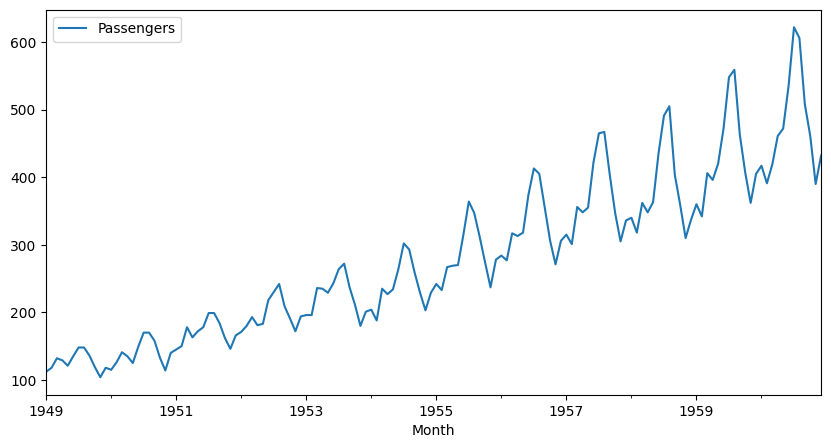

In [3]:
df.plot(figsize=(10, 5));

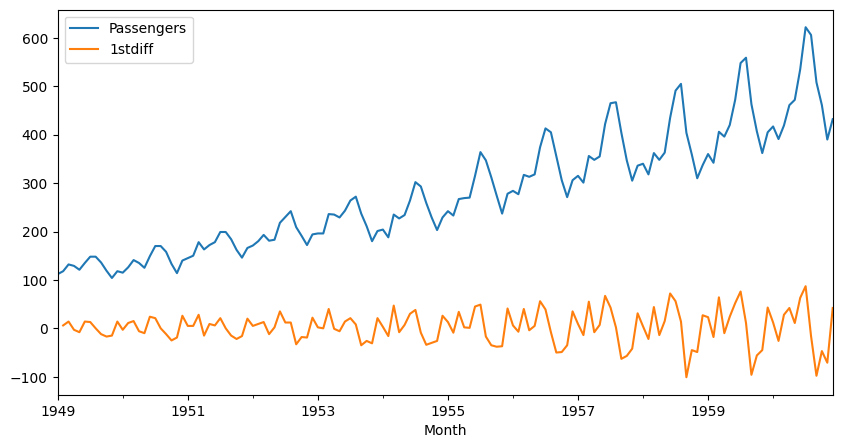

In [4]:
df["1stdiff"] = df["Passengers"].diff()

df.plot(figsize=(10, 5));
# not much stationary because of seasonality over time in this dataset

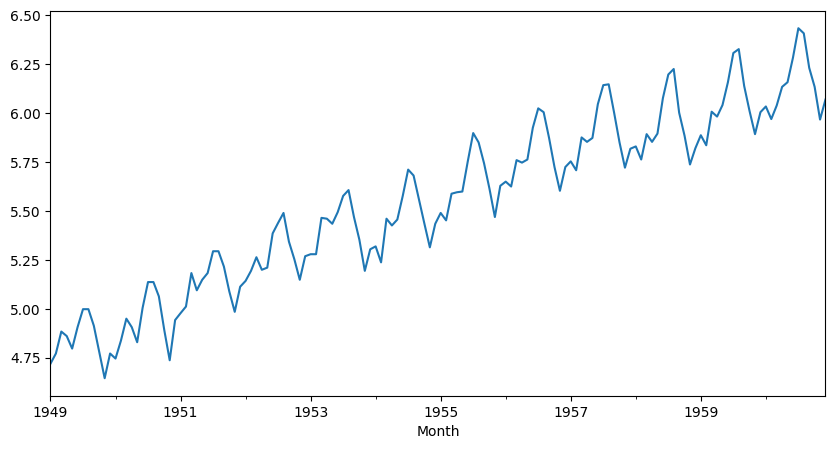

In [5]:
df["LogPassengers"] = np.log(df["Passengers"])

df["LogPassengers"].plot(figsize=(10, 5));

# compared to "Passengers" col, the scale of the values are reduced. So, the
# values are not growing rapidly as the non-log time-series before. Also, the
# amplitudes of the cycles looks more constant than was before.

In [7]:
# set the frequency to our dataset
df.index.freq = "MS"

# create train and test set
Ntest = 12
train = df.iloc[:-Ntest]
test  = df.iloc[-Ntest:]

In [8]:
# get the indexs of the test and train rows
train_idx = df.index <= train.index[-1]
test_idx  = df.index > train.index[-1]

In [9]:
# Now, create AR(1) model
arima = ARIMA(train["Passengers"], order=(1, 0, 0))

arima_result = arima.fit()

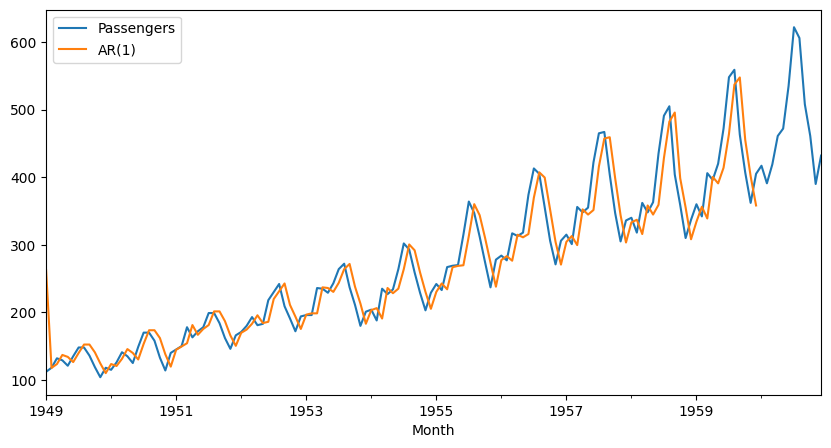

In [12]:
# obtain the training predictions and store the result
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], 
    end=train.index[-1]
)

df[["Passengers", "AR(1)"]].plot(figsize=(10,5));

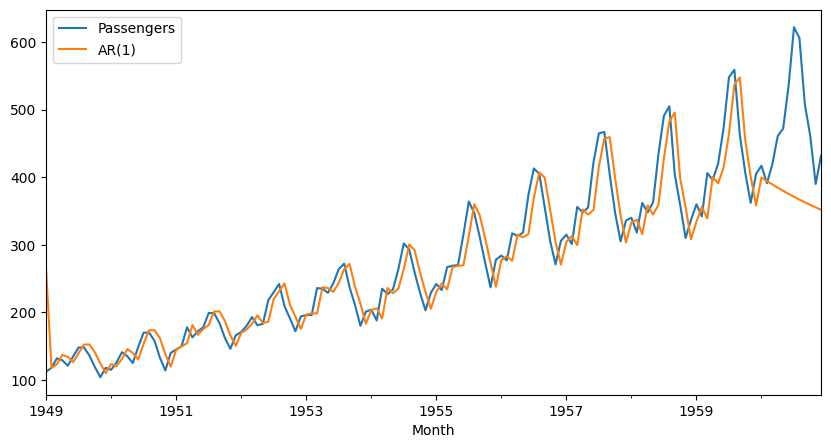

In [14]:
# now the prediction time
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, "AR(1)"] = forecast

df[["Passengers", "AR(1)"]].plot(figsize=(10, 5));

In [15]:
# Explore prediction result further
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [16]:
# confidence interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [17]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df["Passengers"], label="data")
    
    # plot the curve fitted on train data
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color="green", label="fitted")
    
    # forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int["lower Passengers"], conf_int["upper Passengers"]
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label="forecast")
    ax.fill_between(test.index, lower, upper, color="red", alpha=0.3)
    ax.legend()

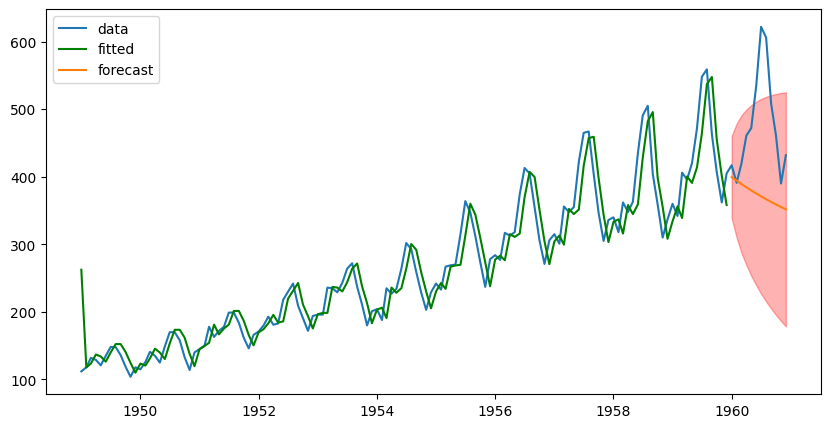

In [18]:
plot_fit_and_forecast(arima_result)

c:\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


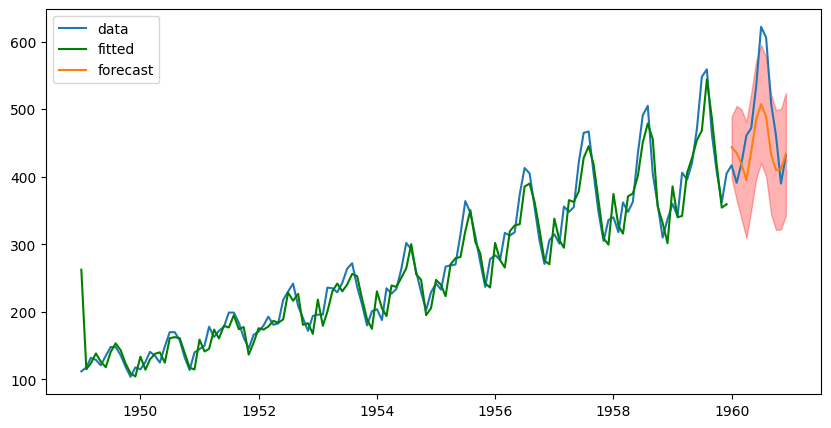

In [19]:
arima = ARIMA(train["Passengers"], order=(10, 0, 0))  # AR(10)
arima_result = arima.fit()

plot_fit_and_forecast(arima_result)

c:\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


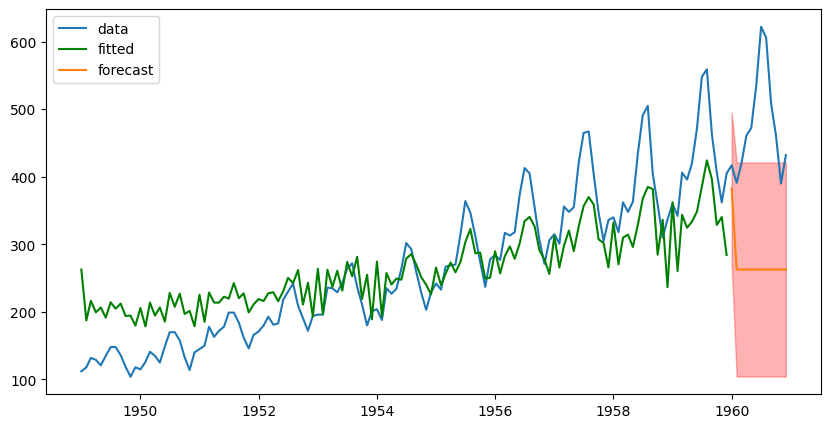

In [20]:
arima = ARIMA(train["Passengers"], order=(0, 0, 1)) # MA(1)
arima_result = arima.fit()

plot_fit_and_forecast(arima_result)

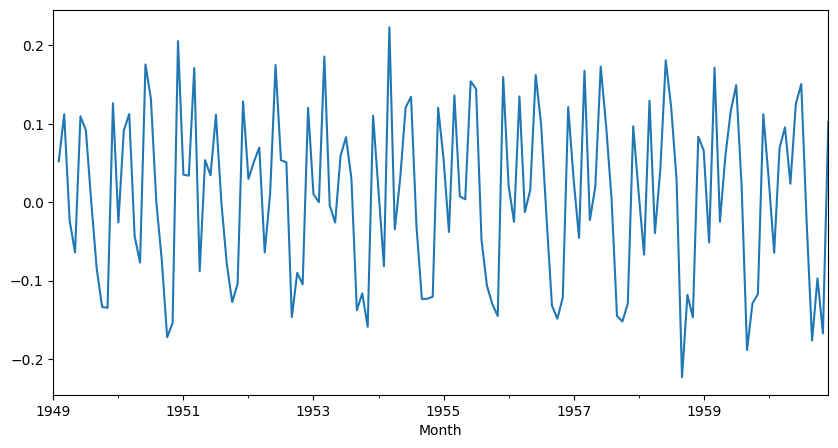

In [21]:
df["Log1stDiff"] = df["LogPassengers"].diff()

df["Log1stDiff"].plot(figsize=(10, 5));

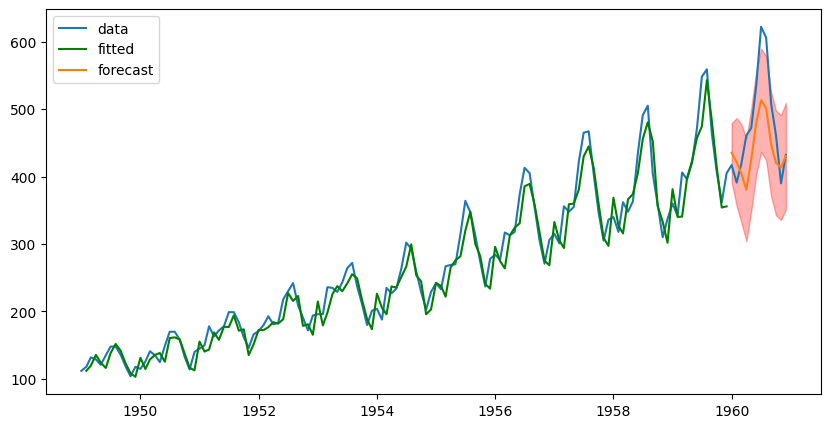

In [22]:
arima = ARIMA(train["Passengers"], order=(8, 1, 1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result, d, col="Passengers"):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df[col], label="data")
    
    # plot the curve fitted on train set
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    
    ax.plot(train.index[d:], train_pred, color="green", label="fitted")
    
    # forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f"lower {col}"], conf_int[f"upper {col}"]
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label="forecast")
    ax.fill_between(test.index, lower, upper, color="red", alpha=0.3)
    ax.legend()
    
plot_fit_and_forecast_int(arima_result_811, 1)

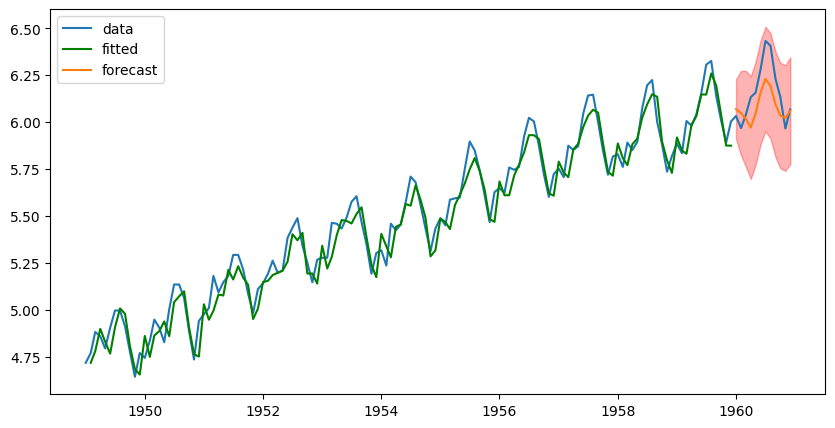

In [23]:
arima = ARIMA(train["LogPassengers"], order=(8, 1, 1))
arima_result_log811 = arima.fit()

plot_fit_and_forecast_int(arima_result_log811, 1, col="LogPassengers")

c:\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


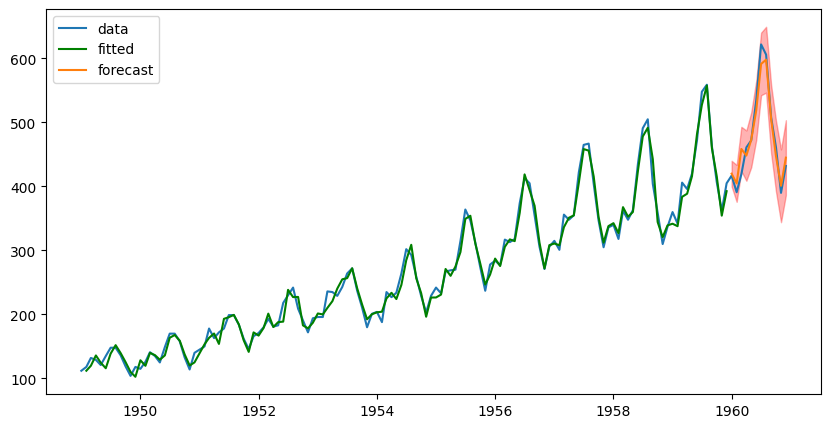

In [24]:
arima = ARIMA(train["Passengers"], order=(12, 1, 0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col="Passengers")

c:\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


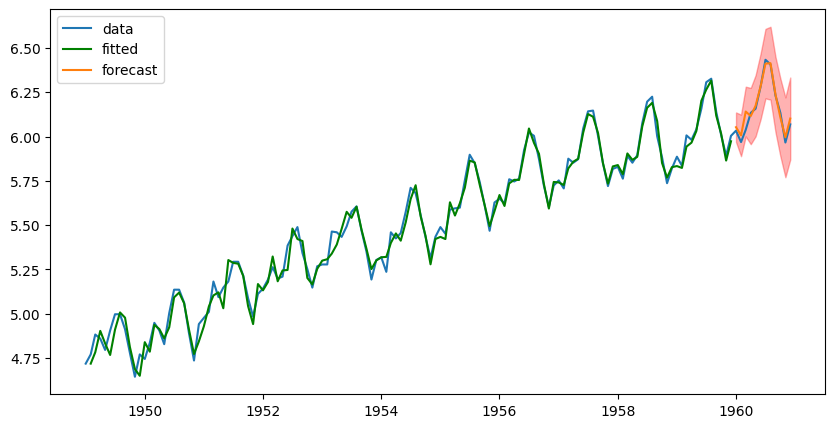

In [25]:
arima = ARIMA(train["LogPassengers"], order=(12, 1, 0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col="LogPassengers")

In [26]:
def rmse(result, is_logged):
    forecast = result.forecast(Ntest)
    
    if is_logged:
        forecast = np.exp(forecast)
        
    t = test["Passengers"]
    y = forecast
    return np.sqrt(np.mean(t-y)**2)

In [30]:
print(f"ARIMA(8,1,1):         {rmse(arima_result_811, False):.4}")
print(f"ARIMA(8,1,1) logged:  {rmse(arima_result_log811, True):.4}")
print(f"ARIMA(12,1,0):        {rmse(arima_result_1210, False):.4}")
print(f"ARIMA(12,1,0) logged: {rmse(arima_result_log1210, True):.4}")

ARIMA(8,1,1):         36.76
ARIMA(8,1,1) logged:  38.26
ARIMA(12,1,0):        0.1892
ARIMA(12,1,0) logged: 6.39
